<h1 style="font-size: 40px; text-align: center;">Praca domowa 6</h1>

<h1 style="font-size: 20px; text-align: center;">Małgorzata Lipińska</h1>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('energy_dataset_.csv')

# Opis zbioru danych

In [19]:
print(df.head)

<bound method NDFrame.head of        Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
0                             4              93.423205            103853.2206   
1                             4             590.468942            190223.0649   
2                             1             625.951142            266023.4824   
3                             1             779.998728            487039.5296   
4                             3             242.106837            482815.0856   
...                         ...                    ...                    ...   
14995                         3             745.032555            280007.5738   
14996                         1              15.187023            377340.5803   
14997                         3             877.539059            480497.3920   
14998                         7             551.264716            436383.1694   
14999                         3             863.421803            314014.3005  

**Typy danych:**
* Ilościowe ilorazowe:
  - Installed_Capacity_MW
  - Energy_Production_MWh
  - Energy_Consumption_MWh
  - Energy_Storage_Capacity_MWh
  - Storage_Efficiency_Percentage
  - Initial_Investment_USD
  - Financial_Incentives_USD
  - GHG_Emission_Reduction_tCO2e
  - Air_Pollution_Reduction_Index
* Jakościowe nominalne:
  - Type_of_Renewable_Energy
  - Grid_Integration_Level
  - Funding_Sources
* Ilościowe zliczeniowe:
  - Jobs_Created

In [20]:
print(len(df['Jobs_Created']))

15000


**Rozmiar ramki danych:**
Ramka danych ma 15000 wierszy

# Policzenie statystyk
Zajmiemy się przykładowo kolumną 'Energy_Production_MWh'

**Przy pomocy wbudowanej funkcji:**

In [21]:
print(df['Energy_Production_MWh'].describe())

count     15000.000000
mean     252350.955621
std      144062.915425
min        1030.103692
25%      128568.875900
50%      253216.871250
75%      377083.805575
max      499991.200400
Name: Energy_Production_MWh, dtype: float64


**Ręcznie:**

In [22]:
print('count:')
print(len(df['Energy_Production_MWh']))

print('mean:')
print(df['Energy_Production_MWh'].mean()) 

print('kwantyle:')
print(df['Energy_Production_MWh'].quantile([0.25,0.5,0.75]))

print('elementy minimalne i maksymalne:')
print(df['Energy_Production_MWh'].min())
print(df['Energy_Production_MWh'].max())


count:
15000
mean:
252350.95562061528
kwantyle:
0.25    128568.875900
0.50    253216.871250
0.75    377083.805575
Name: Energy_Production_MWh, dtype: float64
elementy minimalne i maksymalne:
1030.103692
499991.2004


# Analiza danych ze względu na podział na grupy

In [23]:
data1=df.groupby('Type_of_Renewable_Energy')['Jobs_Created'].sum()
print(data1)

Type_of_Renewable_Energy
1    5401364
2    5530174
3    5414246
4    5238952
5    5402836
6    5352948
7    5199509
Name: Jobs_Created, dtype: int64


# Wykresy analizujące rozkład zmiennych

**Wykres pudełkowy ilości wyprodukowanej energii**

Text(0.5, 1.0, 'Rozkład ilości wyprodukowanej energii')

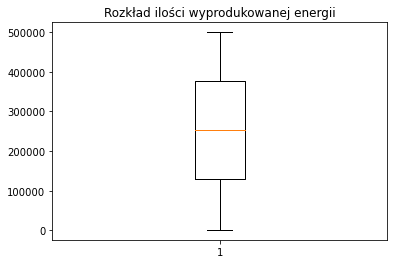

In [24]:
plt.boxplot(df['Energy_Production_MWh'])
plt.title('Rozkład ilości wyprodukowanej energii')

**Wnioski:**
Wykres jest wizulaną reprezentacją powyższej analizy statystyk. Rozkład wydaje się być bardzo symetryczny.

**Wykres pudełkowy ilości zużytej energii**

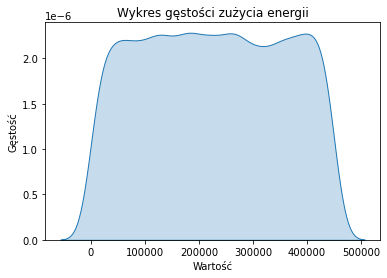

In [25]:
sns.kdeplot(df['Energy_Consumption_MWh'], shade=True)
plt.title('Wykres gęstości zużycia energii')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.show()

**Wnioski:**
W tym przypadku rozkład wydaje się być prawie symetryczny. Można zauważyć, że ilość danych jest podobna w przedziale od 0 do 450000.

# Wykresy wskazujące zależności

**Wykres słupkowy**

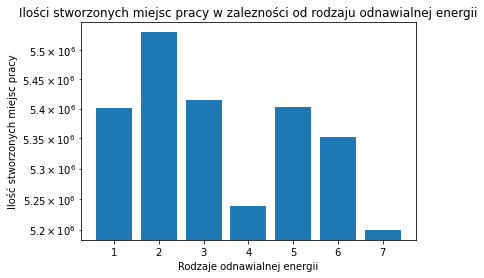

In [26]:
# dane wykorzystamy z poprzedniej analizy
plt.bar(x=data1.index, height=data1.values)
plt.xlabel('Rodzaje odnawialnej energii')
plt.ylabel('Ilość stworzonych miejsc pracy')
plt.title('Ilości stworzonych miejsc pracy w zalezności od rodzaju odnawialnej energii')
plt.yscale('log')  # ustawienie skali na logarytmiczną

**Wnioski:**
Widoczne jest, że najwięcej nowych miejsc pracy zostało stowrzone dla 2. rodzaj odnawialnej energii. Rodzaje 1,3,5 i 6 przyjmują zbliżone wartości. Natomiast zauważalne jest rónież, że zmienne 4 i 7 przyjmują znacznie mniejsze wartości.

**Wykres pudełkowy**

Text(0.5, 1.05, 'Rozkład początkowego wkładu w zależności od źródła finansowania')

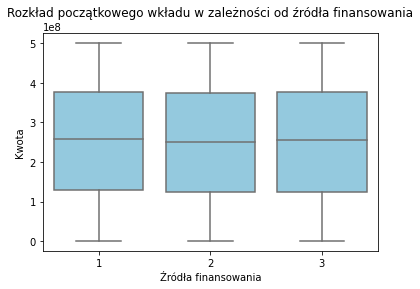

In [51]:
sns.boxplot(x='Funding_Sources', y='Initial_Investment_USD', data=df, color='skyblue') # usunięcie niepotrzebnego kolorowania
plt.xlabel('Źródła finansowania')
plt.ylabel('Kwota')
plt.title('Rozkład początkowego wkładu w zależności od źródła finansowania',y=1.05)

**Wnioski:**
Możemy zauważyć, że różne źródła finansowania mają podobne rozkłady. Kwantyle wydają się być na prawie identyczne. 